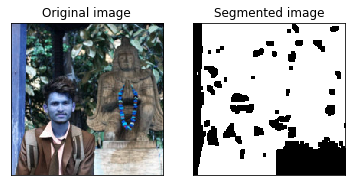

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('prajin.jpg')
gray = cv2. cvtColor(img,cv2. COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel,iterations = 2)

bg = cv2.dilate(closing,kernel,iterations = 1)

dist_transform = cv2.distanceTransform(closing,cv2.DIST_L2,0)
ret, fg = cv2.threshold(dist_transform,0.02* dist_transform.max(),255,0)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original image'),plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(fg,cmap = 'gray')
plt.title('Segmented image'),plt.xticks([]),plt.yticks([])

plt.show()